In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [8]:
medium_data = pd.read_csv('medium_data.csv')

In [9]:
print("Number of records: ", medium_data.shape[0])
print("Number of fields: ", medium_data.shape[1])

Number of records:  6508
Number of fields:  10


In [10]:
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(medium_data['title'])
total_words = len(tokenizer.word_index) + 1

print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("Strong: ", tokenizer.word_index['strong'])
print("And: ", tokenizer.word_index['and'])
print("Consumption: ", tokenizer.word_index['consumption'])

Total number of words:  10971
Word: ID
------------
<oov>:  1
Strong:  4
And:  8
Consumption:  10967


In [11]:
input_sequences = []
for line in medium_data['title']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  43439


In [12]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 566,  61])

In [33]:
with open('max_sequence_len.pickle', 'wb') as handle:
    pickle.dump(max_sequence_len, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [31]:
import pickle
# Save the tokenizer to a file using pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Confirm that the tokenizer has been saved
print("Tokenizer saved successfully.")

Tokenizer saved successfully.


In [13]:
# create features and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [14]:
print(xs[5])
print(labels[5])
print(ys[5][14])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    5  566   61    2  435 1310]
15
0.0


In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(170)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=60, verbose=1)
#print model.summary()
print(model)

Epoch 1/60
1358/1358 [==============================] - 144s 103ms/step - loss: 7.4320 - accuracy: 0.1200
Epoch 2/60
1358/1358 [==============================] - 141s 104ms/step - loss: 6.3633 - accuracy: 0.1659
Epoch 3/60
1358/1358 [==============================] - 140s 103ms/step - loss: 5.1767 - accuracy: 0.1933
Epoch 4/60
1358/1358 [==============================] - 141s 104ms/step - loss: 4.1529 - accuracy: 0.2523
Epoch 5/60
1358/1358 [==============================] - 141s 104ms/step - loss: 3.4510 - accuracy: 0.3229
Epoch 6/60
1358/1358 [==============================] - 141s 104ms/step - loss: 3.0118 - accuracy: 0.3786
Epoch 7/60
1358/1358 [==============================] - 141s 104ms/step - loss: 2.7318 - accuracy: 0.4170
Epoch 8/60
1358/1358 [==============================] - 141s 104ms/step - loss: 2.5068 - accuracy: 0.4532
Epoch 9/60
1358/1358 [==============================] - 141s 104ms/step - loss: 2.3844 - accuracy: 0.4705
Epoch 10/60
1358/1358 [=======================

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

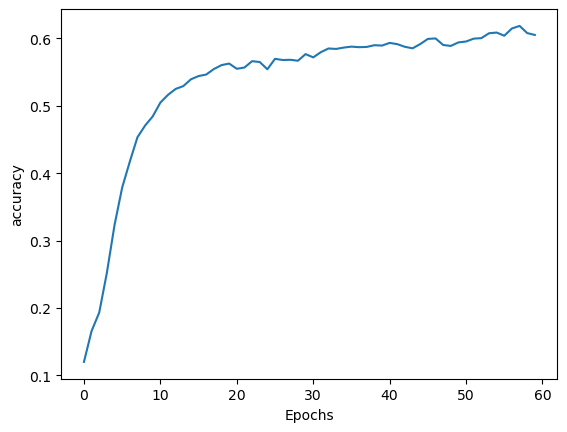

In [12]:
plot_graphs(history, 'accuracy')

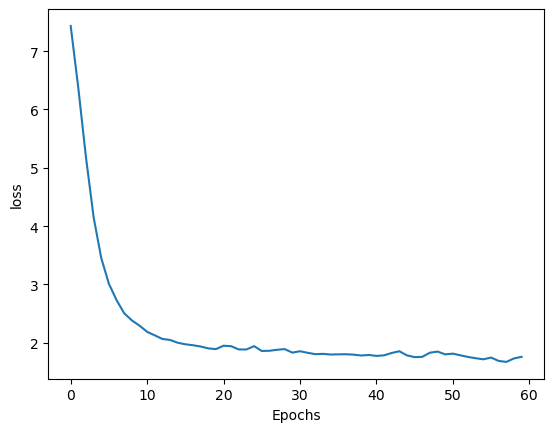

In [13]:
plot_graphs(history, 'loss')

In [ ]:
import numpy as np

seed_text = "implementation of"
next_words = 2
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], padding='pre')
    
    # Use model.predict instead of model.predict_classes
    predicted_probabilities = model.predict(token_list, verbose=0)
    
    # Find the index of the word with the highest probability
    predicted_index = np.argmax(predicted_probabilities)
    
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            output_word = word
            break
            
    seed_text += " " + output_word

print(seed_text)


In [23]:
seed_text = "I am not happy with how"
next_words = 1
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    
    # Use model.predict instead of model.predict_classes
    predicted_probabilities = model.predict(token_list, verbose=0)
    
    # Find the index of the word with the highest probability
    predicted_index = np.argmax(predicted_probabilities)
    
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            output_word = word
            break
            
    seed_text += " " + output_word

print(seed_text)

I am not happy with how far


In [ ]:
seed_text = "I am not happy with how"
next_words = 1
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    
    # Use model.predict instead of model.predict_classes
    predicted_probabilities = model.predict(token_list, verbose=0)
    
    # Find the index of the word with the highest probability
    predicted_index = np.argmax(predicted_probabilities)
    
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            output_word = word
            break
            
    seed_text += " " + output_word

print(seed_text)

In [14]:
from tensorflow.keras.models import load_model
model = load_model('word_model.h5')